<a href="https://colab.research.google.com/github/hs9726/machine_learning_project/blob/main/%ED%85%8C%EC%8A%A4%ED%8A%B8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kaggle API 라이브러리 설치
!pip install kaggle

# API 키 설정 (Google Colab 사용 시)
from google.colab import files
files.upload()  # kaggle.json 파일 업로드

# API 키 저장
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# 데이터셋 다운로드
!kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

# 압축 해제
!unzip vehicle-dataset-from-cardekho.zip

# 데이터 로드
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('car data.csv')

# 데이터 확인
print("데이터 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기본 통계 정보:")
print(df.describe())

Dataset URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
License(s): DbCL-1.0
  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 76.3MB/s]
Archive:  vehicle-dataset-from-cardekho.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            
  inflating: car details v4.csv      
데이터 크기: (301, 9)

처음 5개 행:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer  

In [ ]:
# 결측치 확인
print("결측치 개수:")
print(df.isnull().sum())

# 필요한 컬럼만 선택
df = df[['Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

# 범주형 데이터 원-핫 인코딩
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

print("\n전처리 후 데이터:")
print(df.head())

결측치 개수:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

전처리 후 데이터:
   Year  Selling_Price  Kms_Driven  Fuel_Type_CNG  Fuel_Type_Diesel  \
0  2014           3.35       27000          False             False   
1  2013           4.75       43000          False              True   
2  2017           7.25        6900          False             False   
3  2011           2.85        5200          False             False   
4  2014           4.60       42450          False              True   

   Fuel_Type_Petrol  Seller_Type_Dealer  Seller_Type_Individual  \
0              True                True                   False   
1             False                True                   False   
2              True                True                   False   
3              True                True                   False   
4             False               

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 전처리
def preprocess_data(df):
    """
    데이터 전처리 함수
    - 특성 스케일링
    - 학습/테스트 데이터 분리
    """
    # 특성(X)과 타겟(y) 분리
    X = df.drop('Selling_Price', axis=1)
    y = df['Selling_Price']

    # 학습용과 테스트용 데이터 분리 (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 특성 스케일링
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
# 2. 모델 학습 및 평가
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    여러 모델을 학습하고 평가하는 함수
    """
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42)
    }

    results = {}

    for name, model in models.items():
        print(f"\n=== {name} ===")

        # 모델 학습
        model.fit(X_train, y_train)

        # 예측
        y_pred = model.predict(X_test)

        # 평가 지표 계산
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        print(f'RMSE: {rmse:,.0f}')
        print(f'R2 Score: {r2:.3f}')

        results[name] = {
            'model': model,
            'rmse': rmse,
            'r2': r2,
            'predictions': y_pred
        }

    return results

In [ ]:
# 3. 시각화 함수
def visualize_results(y_test, results):
    """
    모델 예측 결과를 시각화하는 함수
    """
    plt.figure(figsize=(12, 6))

    for name, result in results.items():
        plt.scatter(y_test, result['predictions'], alpha=0.5, label=name)

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2)
    plt.xlabel('real price')
    plt.ylabel('predict price')
    plt.title('real price vs predict price')
    plt.legend()
    plt.show()


=== Linear Regression ===
RMSE: 3
R2 Score: 0.590

=== Random Forest ===
RMSE: 2
R2 Score: 0.823

=== XGBoost ===
RMSE: 3
R2 Score: 0.678


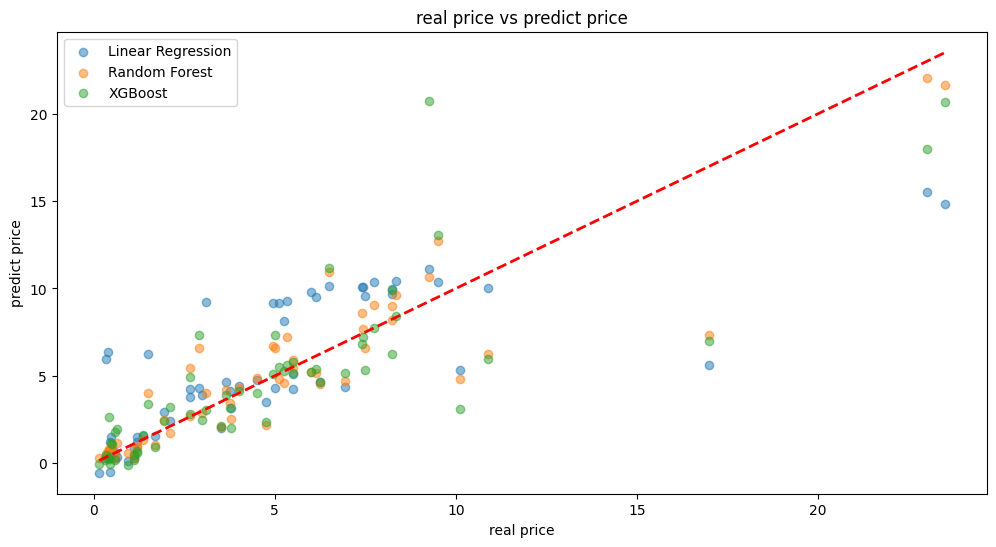


최적 모델: Random Forest


In [ ]:
# 메인 실행 코드
if __name__ == '__main__':

    X = df.drop('Selling_Price', axis=1)
    y = df['Selling_Price']

    # 데이터 전처리
    X_train_scaled, X_test_scaled, y_train, y_test = preprocess_data(df)

    # 모델 학습 및 평가
    results = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

    # 결과 시각화
    visualize_results(y_test, results)

    # 가장 좋은 모델 찾기
    best_model = min(results.items(), key=lambda x: x[1]['rmse'])
    print(f"\n최적 모델: {best_model[0]}")

In [ ]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV로 최적 파라미터 찾기
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# 최적 파라미터 확인
print("최적 파라미터:", grid_search.best_params_)

최적 파라미터: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


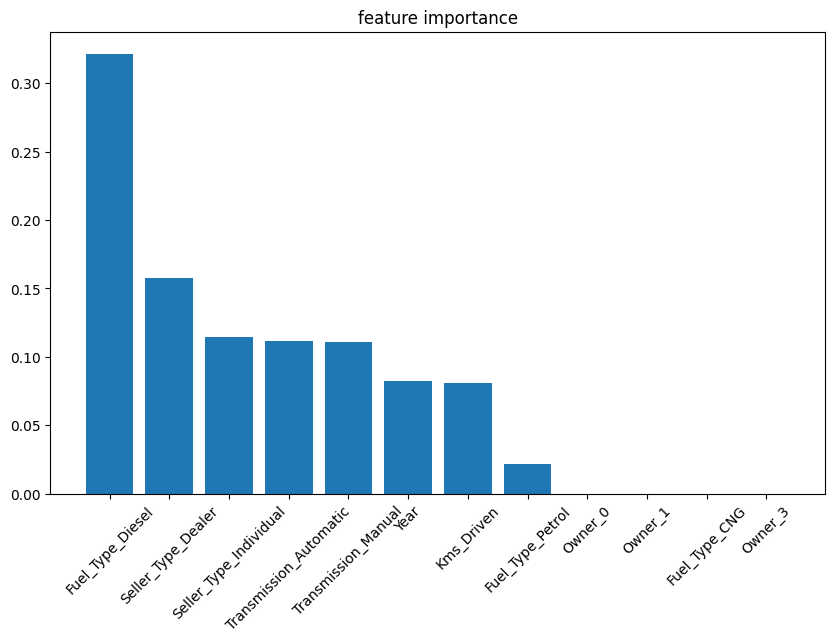

In [ ]:
# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': grid_search.best_estimator_.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45)
plt.title('feature importance')
plt.show()

In [ ]:
import joblib

# 최적화된 모델 저장
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [ ]:
# 필요한 라이브러리 설치
!pip install flask-ngrok
!pip install flask_cors
!pip install pyngrok
!ngrok config add-authtoken ???  # ngrok 계정의 authtoken이 필요합니다

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
from flask_cors import CORS
import joblib
import pandas as pd
import os
# 모든 ngrok 프로세스 완전 종료 후 다시 시작
from pyngrok import ngrok, conf

# 모든 프로세스 종료
ngrok.kill()

app = Flask(__name__)
CORS(app)

# 모델 로드
best_model = joblib.load('/content/best_random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        print("받은 데이터:", data)  # 디버깅용

        # 데이터프레임으로 변환
        input_data = {
            'Year': [data['year']],
            'Kms_Driven': [data['kms_driven']],
            'Fuel_Type_Cng': [data['fuel_type_cng']],
            'Fuel_Type_Diesel': [data['fuel_type_diesel']],
            'Fuel_Type_Petrol': [data['fuel_type_petrol']],
            'Seller_Type_Individual': [data['seller_type_individual']],
            'Seller_Type_Dealer': [data['seller_type_dealer']],
            'Transmission_Manual': [data['transmission_manual']],
            'Transmission_Automatic': [data['transmission_automatic']],
            'Owner_0': [data['owner_0']],
            'Owner_1': [data['owner_1']],
            'Owner_3': [data['owner_3']]
        }

        input_df = pd.DataFrame(input_data)
        print("변환된 데이터프레임:", input_df)  # 디버깅용

        prediction = best_model.predict(input_df)
        print("예측값:", prediction)  # 디버깅용

        return jsonify({'predicted_price': float(prediction[0])})

    except Exception as e:
        print("에러 발생:", str(e))
        return jsonify({'error': str(e)}), 500

def run_app():
    try:
        # ngrok 설정
        public_url = ngrok.connect(5000)
        print('Public URL:', public_url)

        # Flask 앱 실행
        app.run(debug=False)  # debug 모드를 False로 설정
    except Exception as e:
        print(f"Error: {e}")

if __name__ == '__main__':
    print("서버 시작...")
    run_app()

서버 시작...
Public URL: NgrokTunnel: "https://35c3-34-48-144-196.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:32:41] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 14000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': False, 'transmission_manual': True, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014       14000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                 True   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                   False    False    False    False  
예측값: [4.34245083]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:39:40] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 14000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014       14000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True    False    False    False  
예측값: [4.34245083]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:41:29] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 14000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014       14000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True    False    False    False  
예측값: [4.34245083]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:44:26] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 140000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': False, 'transmission_manual': True, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014      140000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                 True   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                   False    False    False    False  
예측값: [4.34245083]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:48:02] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 140000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': False, 'seller_type_individual': True, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014      140000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                    True               False                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True    False    False    False  
예측값: [6.32322832]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:48:54] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 140000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': False, 'seller_type_individual': True, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014      140000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                    True               False                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True    False    False    False  
예측값: [6.32322832]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:49:04] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 140000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014      140000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True    False    False    False  
예측값: [4.34245083]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:49:15] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 1400000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': False, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014     1400000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True    False    False    False  
예측값: [4.34245083]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:55:57] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 140000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': False, 'owner_1': True, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014      140000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True    False     True    False  
예측값: [4.34245083]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:57:55] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 140000, 'fuel_type_cng': False, 'fuel_type_diesel': True, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': True, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014      140000          False              True             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True     True    False    False  
예측값: [9.30036917]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [15/Jan/2025 03:58:13] "POST /predict HTTP/1.1" 200 -


받은 데이터: {'year': 2014, 'kms_driven': 140000, 'fuel_type_cng': True, 'fuel_type_diesel': False, 'fuel_type_petrol': False, 'seller_type_dealer': True, 'seller_type_individual': False, 'transmission_automatic': True, 'transmission_manual': False, 'owner_0': True, 'owner_1': False, 'owner_3': False}
변환된 데이터프레임:    Year  Kms_Driven  Fuel_Type_Cng  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014      140000           True             False             False   

   Seller_Type_Individual  Seller_Type_Dealer  Transmission_Manual  \
0                   False                True                False   

   Transmission_Automatic  Owner_0  Owner_1  Owner_3  
0                    True     True    False    False  
예측값: [4.34245083]
